In [7]:
# recursive expression for the average
def average_filter(prev_avg, new_data_point, k):
    alpha = (1 - 1/k)
    return alpha * prev_avg + (1 - alpha) * new_data_point

# example: average x = [10, 20, 30]
x = [10, 20, 30]
running_avg = 0
k = 1
for i in range(len(x)):
    running_avg = average_filter(running_avg, x[i], k)
    k += 1

print(running_avg)

20.0


In [21]:
# example: measuring voltage
# target: 14.4V
# noise: +/- [-4, 4]
import numpy as np

# parameters
target = 14.4 # true voltage
dt = 0.2 # timestep
t = 10 # total time
numSamples = int(t / dt)

# generate noisy voltage readings
voltages = []
for _ in range(numSamples):
    noise = np.random.uniform(low=-4, high=4)
    voltages.append(target + noise)

# average filter loop
running_avg = 0
running_avgs = []
k = 1
for i, v in enumerate(voltages):
    k = i + 1
    running_avg = average_filter(running_avg, v, k)
    running_avgs.append(running_avg)


# make a list of targets the same size as voltages
targetArr = []
for _ in range(numSamples):
    targetArr.append(target)
    

print(np.isclose(running_avg, target, atol=0.5))






True


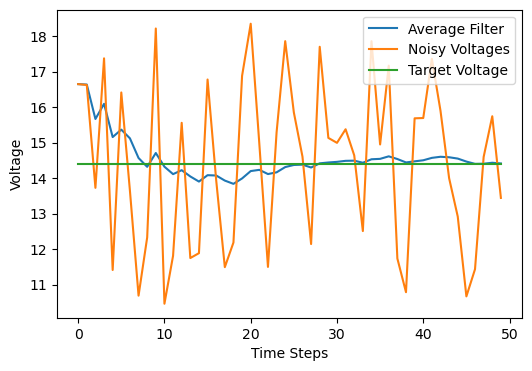

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(running_avgs, label = "Average Filter")
plt.plot(voltages, label="Noisy Voltages")
plt.plot(targetArr, label="Target Voltage")

plt.xlabel("Time Steps")
plt.ylabel("Voltage")
plt.legend()

plt.show()